In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import ticker
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
import datetime
import os
import re
import pandas as pd
import shutil
from scipy.stats import entropy

from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimg

from glmtools.io.glm import GLMDataset

import warnings
warnings.filterwarnings("ignore")

#Turn off interactive plotting for pyplot
plt.ioff()

In [2]:
dorian_processed = xr.open_dataset('./Processed_Dorian.nc')
dp = dorian_processed.to_dataframe()
del dorian_processed

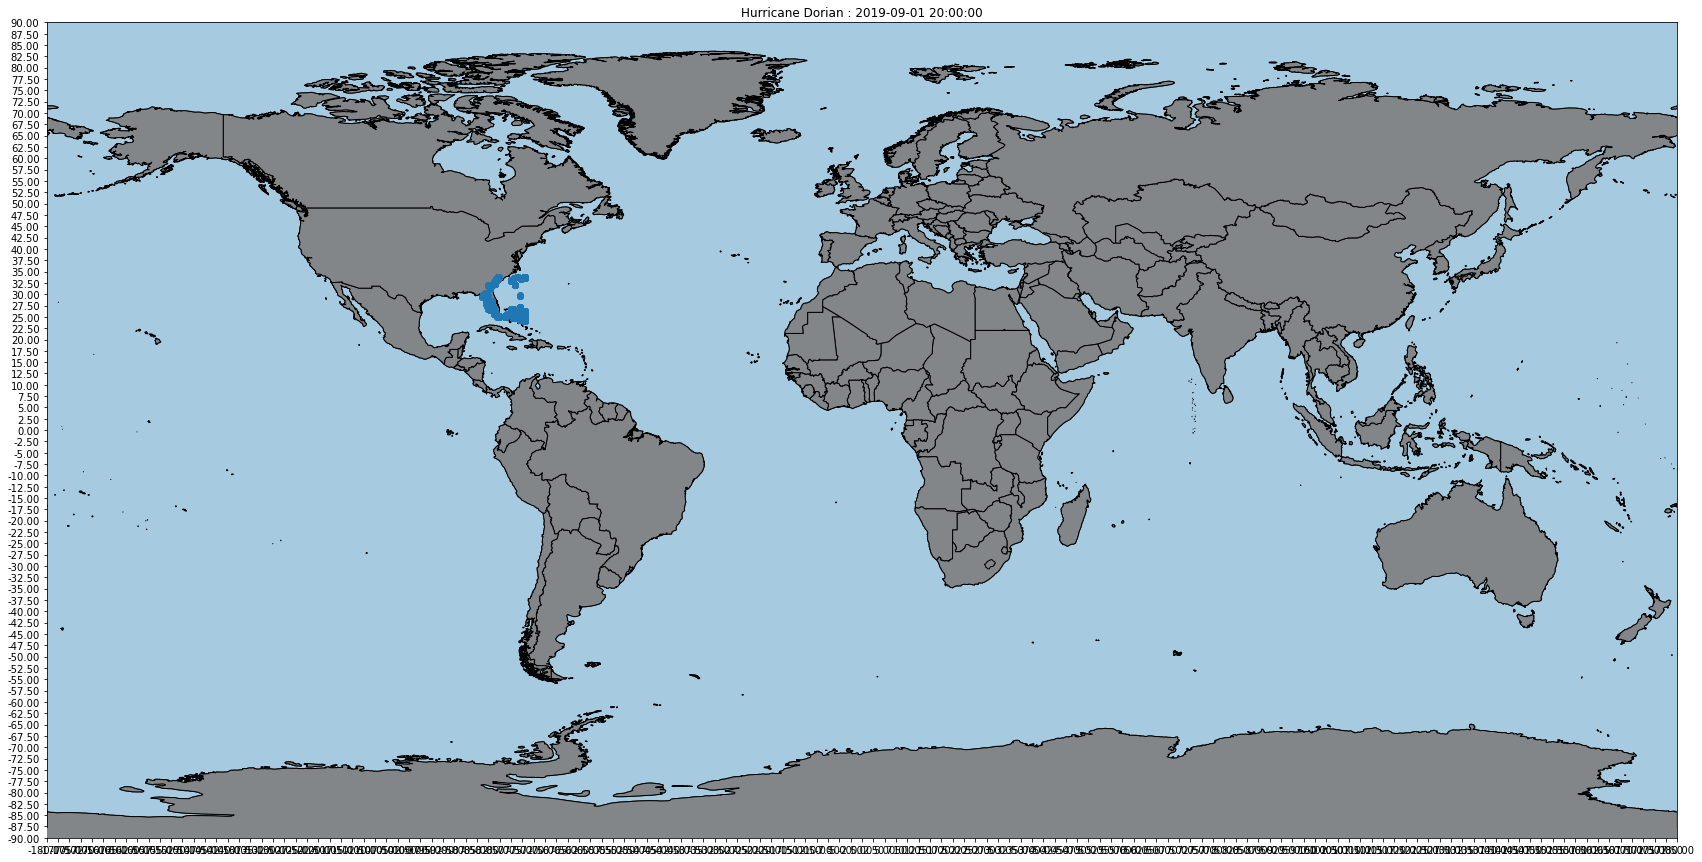

In [8]:
# Choose the shapefile
shp_file = "./World_Countries__Generalized_-shp/World_Countries__Generalized_"

# Select a random slice from this time
date = pd.to_datetime("2019-09-01 20:00:00")
subset = dp[(dp['group_time_offset'] >= date) & (dp['group_time_offset'] < date + datetime.timedelta(minutes=10))].copy()

# Setup the figure
fig, ax = plt.subplots(figsize=(30,15))

# Setup reading the shapefile data
m = Basemap()
m.readshapefile(shp_file, 'world',linewidth=1)

# This creates the background colors and the coastlines
patches = [Polygon(np.array(shape), True) for info, shape in zip(m.world_info, m.world)]
ax.add_collection(PatchCollection(patches, facecolor= '#838688', edgecolor='k', linewidths=1., zorder=2))
ax.add_patch(mpl.patches.Rectangle((-180,-89),360,180,color='#a6cae0'))
ax.add_patch(mpl.patches.Rectangle((-179.9,-89.9),360,2,color='#838688',zorder=3))

# These are more general image settings
plt.title(f"Hurricane Dorian : {date}")
edges = (-180,180,-90,90) # Left, Right, Bottom, Top
xlim = np.append(np.arange(edges[0],edges[1],step=2.5),edges[1])
ylim = np.append(np.arange(edges[2],edges[3],step=2.5),edges[3])
ax.set_xticks(xlim)
ax.set_yticks(ylim)
ax.set_xlim(edges[0],edges[1])
ax.set_ylim(edges[2],edges[3])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Actually plot the data|
plt.scatter(subset['group_lon'],subset['group_lat'],zorder=5)
plt.show()